In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

1. Load the dataset into python environment</P>

In [3]:
dataset=pd.read_csv(r'D:\Sibina\ICT academy\Case Studies\Case Study#06\titanic_dataset.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Make ‘PassengerId’ as the index column

In [5]:
dataset=pd.read_csv(r'D:\Sibina\ICT academy\Case Studies\Case Study#06\titanic_dataset.csv',index_col='PassengerId')
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
dataset.shape

(891, 11)

In [8]:
dataset.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Cabin column has more than its 50% of entries null, so droping it.

In [9]:
dataset.drop('Cabin',inplace=True,axis=1)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [11]:
dataset.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

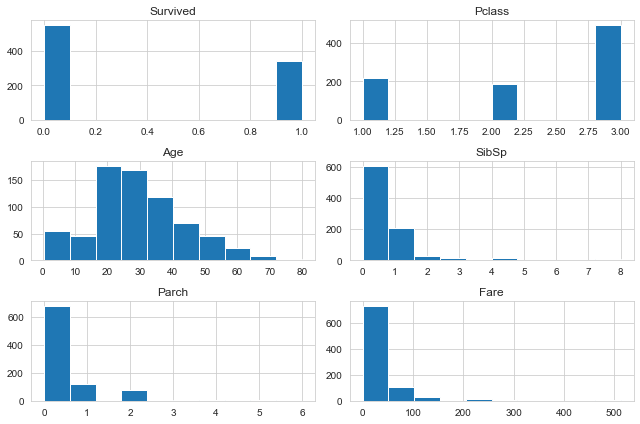

In [12]:
freqgraph=dataset.select_dtypes(include=['float','int64'])#only float,int64 dtype column values are plotted
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Density'>

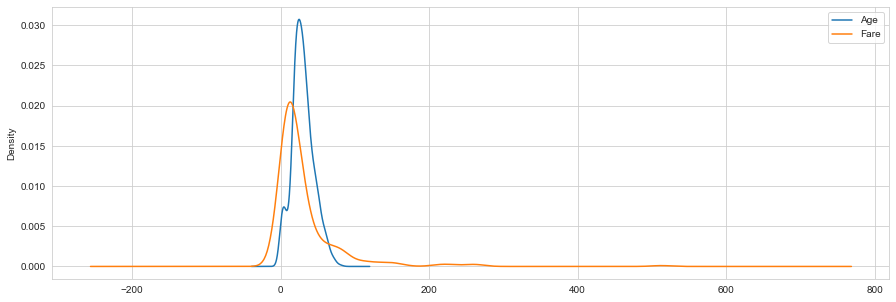

In [13]:
dataset[['Age','Fare']].plot.kde(figsize=(15,5))

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

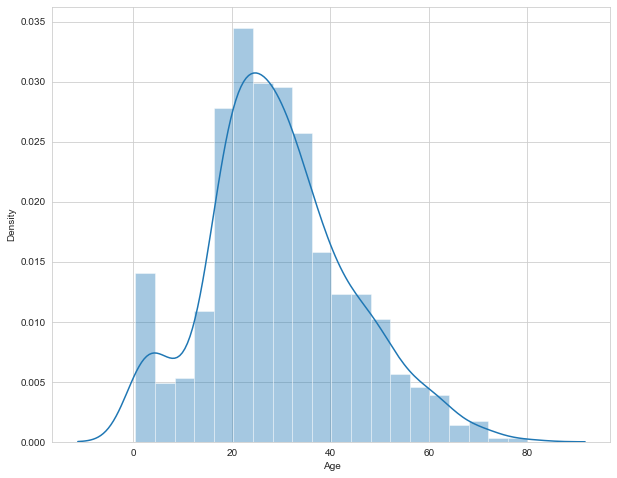

In [14]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(dataset.Age)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

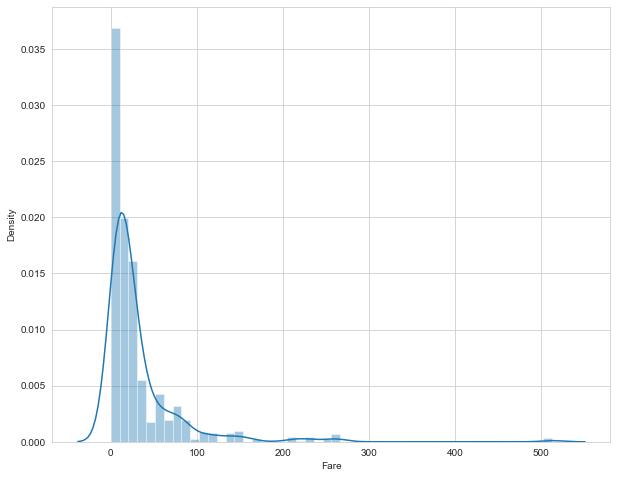

In [15]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(dataset.Fare)

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


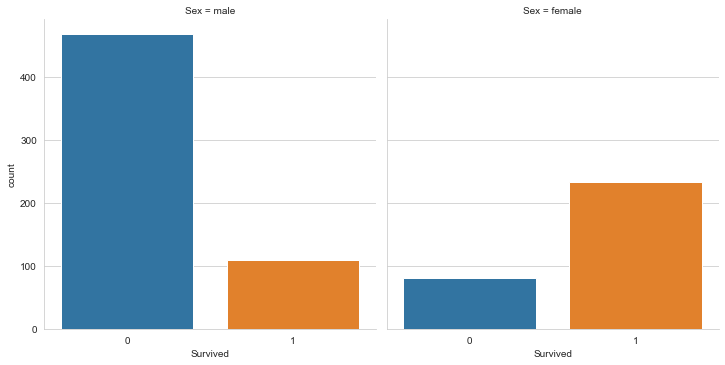

In [16]:
sns.factorplot(x="Survived",col="Sex",kind="count",data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

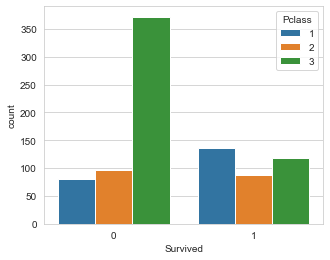

In [17]:
sns.countplot(x="Survived",hue="Pclass",data=dataset)

In [18]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

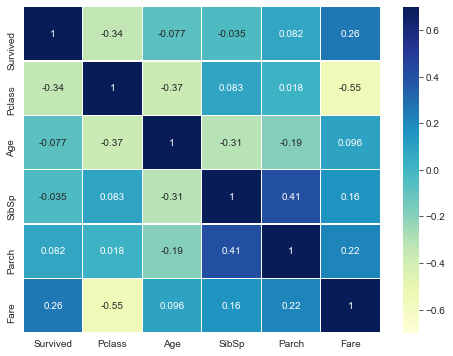

In [19]:
corr= dataset.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr,vmin=-0.7, vmax=0.7,linewidths=0.2,annot=True,cmap="YlGnBu")

Inferences:
a. The size of dataset after making passenger id as index is 891 entries with 11 columns

b. There is huge number of missing values present in case of "cabin" details; 687 values are missing. which is then followed by missing information about age(177 missing values)

c. There are 2 values missining incase of "embarked" column

d. There were 3 types of passenger classes & embarking options available

e. Ticket fares varied from 0 to 512.32

f. More males died in compared to females, and female passengers survived more than males.

g. Most of the passengers belonging to class3 did'nt survived. Survival count of passengers belonging to class1 was high compared to other classes

h. Age & Fare distribution is slightly right skewed



4. Fill in all the missing values present in all the columns in the dataset

In [20]:
dataset.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [21]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
print('mean age:',dataset['Age'].mean())
print('median age:',dataset['Age'].median())

mean age: 29.69911764705882
median age: 28.0


(i) Age column is almost normally distributed but slightly right skewed; so filling the missing values in Age column can be done by median value.


In [23]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].median())

In [24]:
dataset.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

(ii)Filling Embarked coulumn with its mode value; since its a categorical variable

In [26]:
mode_embarked=dataset['Embarked'].mode()
print('The mode of Embarked column:',dataset['Embarked'].mode())

The mode of Embarked column: 0    S
dtype: object


In [27]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [28]:
dataset.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

So,all the null values are removed from dataset

5. Check and handle outliers in at least 3 columns in the dataset

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.9+ KB


The dataset is suspected to have outliers in numerical columns. So checking :

(a) Age

(b) Fare

(c) Parch

(d) SibSp

And removing the outliers from 3 columns according to the relevance

<AxesSubplot:title={'center':'Boxplot-Age'}, xlabel='Age'>

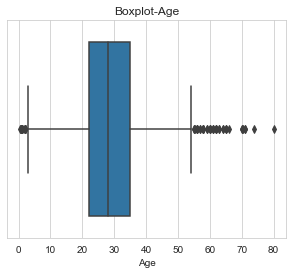

In [31]:
plt.title('Boxplot-Age')
sns.boxplot(x='Age',data=dataset)

<AxesSubplot:title={'center':'Boxplot-Fare'}, xlabel='Fare'>

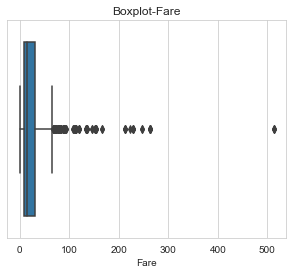

In [32]:
plt.title('Boxplot-Fare')
sns.boxplot(x='Fare',data=dataset)

<AxesSubplot:title={'center':'Boxplot-Parch'}, xlabel='Parch'>

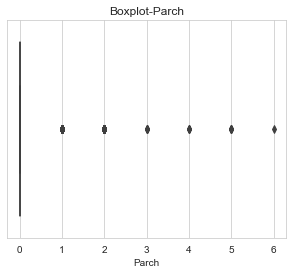

In [33]:
plt.title('Boxplot-Parch')
sns.boxplot(x='Parch',data=dataset)

<AxesSubplot:title={'center':'Boxplot-SibSp'}, xlabel='SibSp'>

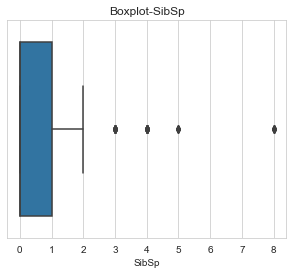

In [34]:
plt.title('Boxplot-SibSp')
sns.boxplot(x='SibSp',data=dataset)

# Removing outliers form Age column:

In [35]:
Q1=np.percentile(dataset['Age'],25,interpolation='midpoint')
Q2=np.percentile(dataset['Age'],50,interpolation='midpoint')
Q3=np.percentile(dataset['Age'],75,interpolation='midpoint')
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
IQR=Q3-Q1
print('IQR of Age=',IQR)

Q1: 22.0
Q2: 28.0
Q3: 35.0
IQR of Age= 13.0


In [36]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print('Lower Limit_Age:',lower_limit)
print('Upper Limit_Age:',upper_limit)

Lower Limit_Age: 2.5
Upper Limit_Age: 54.5


In [37]:
#Removing outliers above and below upper and lower limits
outlier=[]
for x in dataset['Age']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
print('Outliers of Age data=',outlier)
print('The corresponding indexes are as follows:')
ind1=dataset['Age']>upper_limit
dataset.loc[ind1].index

Outliers of Age data= [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]
The corresponding indexes are as follows:


Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [38]:
dataset.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  849 non-null    int64  
 1   Pclass    849 non-null    int64  
 2   Name      849 non-null    object 
 3   Sex       849 non-null    object 
 4   Age       849 non-null    float64
 5   SibSp     849 non-null    int64  
 6   Parch     849 non-null    int64  
 7   Ticket    849 non-null    object 
 8   Fare      849 non-null    float64
 9   Embarked  849 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 73.0+ KB


<AxesSubplot:title={'center':'Boxplot-Age-After the removal of outliers'}, xlabel='Age'>

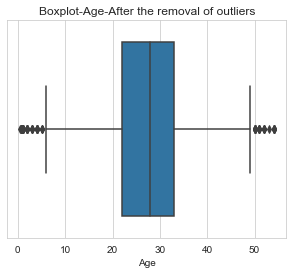

In [40]:
plt.title('Boxplot-Age-After the removal of outliers')
sns.boxplot(x='Age',data=dataset)

(b) Removing outliers form Fare column:

In [72]:
Q1=np.percentile(dataset['Fare'],25,interpolation='midpoint')
Q2=np.percentile(dataset['Fare'],50,interpolation='midpoint')
Q3=np.percentile(dataset['Fare'],75,interpolation='midpoint')
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
IQR=Q3-Q1
print('IQR=',IQR)

lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print('Lower Limit_Fare:',lower_limit)
print('Upper Limit_Fare:',upper_limit)
outlier=[]
for x in dataset['Fare']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
        
print('Outliers of fare data=',outlier)

Q1: 7.8542
Q2: 10.5
Q3: 21.0
IQR= 13.145800000000001
Lower Limit_Fare: -11.864500000000003
Upper Limit_Fare: 40.7187
Outliers of fare data= [53.1, 51.8625, 52.0, 41.5792, 47.1, 52.0, 53.1, 50.0, 52.5542, 52.0, 51.8625, 52.0, 49.5, 51.4792, 42.4, 41.5792, 52.5542, 52.0, 52.0, 46.9, 41.5792, 49.5042, 52.0, 53.1, 53.1, 53.1, 50.4958, 52.5542]


In [73]:
ind1=dataset['Fare']>upper_limit 
a=dataset.loc[ind1].index
dataset.drop(a,inplace=True)

<AxesSubplot:title={'center':'Boxplot-Fare -After the removal of outliers'}, xlabel='Fare'>

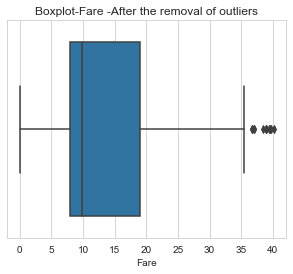

In [74]:
plt.title('Boxplot-Fare -After the removal of outliers')
sns.boxplot(x='Fare',data=dataset)

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  655 non-null    int64  
 1   Pclass    655 non-null    int64  
 2   Sex       655 non-null    object 
 3   Age       655 non-null    float64
 4   SibSp     655 non-null    int64  
 5   Parch     655 non-null    int64  
 6   Fare      655 non-null    float64
 7   Embarked  655 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 46.1+ KB


In [76]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

(c) Removing outliers form Sibsp column:

In [80]:
Q1=np.percentile(dataset['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(dataset['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(dataset['SibSp'],75,interpolation='midpoint')
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
IQR=Q3-Q1
print('IQR_SibSp=',IQR)

lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print('Lower Limit_SibSp:',lower_limit)
print('Upper Limit_SibSp:',upper_limit)
outlier=[]
for x in dataset['SibSp']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
        
print('Outliers of SibSp data=',outlier)

Q1: 0.0
Q2: 0.0
Q3: 0.0
IQR_SibSp= 0.0
Lower Limit_SibSp: 0.0
Upper Limit_SibSp: 0.0
Outliers of SibSp data= []


In [81]:
ind2=dataset['SibSp']>upper_limit 
b=dataset.loc[ind2].index
dataset.drop(b,inplace=True)

<AxesSubplot:title={'center':'Boxplot-SibSp -After the removal of outliers'}, xlabel='SibSp'>

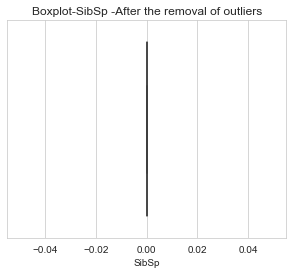

In [82]:
plt.title('Boxplot-SibSp -After the removal of outliers')
sns.boxplot(x='SibSp',data=dataset)

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 3 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  503 non-null    int64  
 1   Pclass    503 non-null    int64  
 2   Sex       503 non-null    object 
 3   Age       503 non-null    float64
 4   SibSp     503 non-null    int64  
 5   Parch     503 non-null    int64  
 6   Fare      503 non-null    float64
 7   Embarked  503 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 51.5+ KB


Observations:</p>
(i)There is one more thing to be noted here is that after the removal of outliers from "Fare" column, the mean fare came down and this may not make any sense since, there are chances of someone buying tickets at very high prices for a luxury suit room tickets. So the removal of outliers from "Fare" column is not logically valid

(ii)During each time of removal of outliers; corresponding row elements of other columns is getting reduced; so the final dataset is reduced in row elements.data corresponding to a particular index row in one column may not be an outlier in other column

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [85]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [86]:
dataset=pd.get_dummies(dataset,columns=['Pclass','Sex','Embarked'])

In [87]:
dataset.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,28.0,0,0,8.4583,0,0,1,0,1,0,1,0
9,1,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
13,0,20.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [88]:
y=dataset["Survived"]
x=dataset.drop("Survived",axis=1)

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [90]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE value:',mean_squared_error(y_test,predictions))
rsquare= r2_score(y_test,predictions)
print('R^2 value:',r2_score(y_test,predictions))

MSE value: 0.1309474131552684
R^2 value: 0.33538327005976953


In [92]:
x.describe()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,28.481610,0.0,0.159046,12.114064,0.109344,0.220676,0.669980,0.258449,0.741551,0.139165,0.111332,0.749503
std,9.337699,0.0,0.577252,7.876339,0.312381,0.415115,0.470688,0.438218,0.438218,0.346463,0.314856,0.433731
min,0.420000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.0,0.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,28.000000,0.0,0.000000,8.050000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,32.000000,0.0,0.000000,13.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,54.000000,0.0,5.000000,40.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
